In [27]:
#GENRATING DRAGONS

import random
from random import randint
#print(randint(0, 9)) results in a number from [0,9]

#DRAGON SECTS
#https://pathfinderwiki.com/wiki/Dragon#Draconic_septs
#metalic dragons=Good brass, copper, bronze, silver, and gold
#chromatic dragons=Evil "white", "black", "green", "blue", "red" 
#Primal dragons=Chaotic brine, cloud, crystal, magma, and umbral
#Outer dragons=Lawful lunar, solar, time, void, vortex

#good
metallic_dragons=["brass", "copper", "bronze", "silver", "gold"]

#evil
chromatic_dragons=["white", "black", "green", "blue", "red"]

#chaotic
primal_dragons=["brine", "cloud", "crystal", "magma", "umbral"]

#lawful
outer_dragons=["lunar", "solar", "time", "void", "vortex"]


#dragons_sects[type][subtype]
dragon_sects =[metallic_dragons,chromatic_dragons,primal_dragons,outer_dragons]

#ALIGNMENTS
law_chaos=["lawful","lawful","neutral","chaotic","chaotic"]
good_evil=["good","good","neutral","evil","evil"]





#return dragon as a string    
def generateDragon():    

    sect_nr=randint(0,len(dragon_sects)-1)
    
    subsect_nr=randint(0,len(dragon_sects[sect_nr])-1)
    
    lawfulness_nr=randint(0,len(law_chaos)-1)   
    
    morality_nr=randint(0,len(good_evil)-1)
    
    return law_chaos[lawfulness_nr]+" "+good_evil[morality_nr]+" "+dragon_sects[sect_nr][subsect_nr]+" dragon"



#returns 0 if dragon alignment is incorrect, 1 if correct 
def generateCorectness(dragonstring):
    
    splitdragon=dragonstring.split()
    
    #print(dragon)
    
    #chaotic evil brass dragon
    if splitdragon[1] == "evil" and splitdragon[2] in metallic_dragons:
        #print(0)
        return 0  
    
    elif splitdragon[1] == "good" and splitdragon[2] in chromatic_dragons:
        #print(0)
        return 0  
    
    elif splitdragon[0] == "lawful" and splitdragon[2] in primal_dragons:
        #print(0)
        return 0 
    
    elif splitdragon[0] == "chaotic" and splitdragon[2] in outer_dragons:
        #print(0)
        return 0 
    
    else:
        #print(1)
        return 1

   
    


#FUNCTION TO ACTUALLY GENERATE AN ARRAY OF DRAGONS
def generateArrays(size):
    
    generated_dragons=[]
    correctness=[]

    for i in range(size):    

        tempdragon=generateDragon()

        tempcorrect=generateCorectness(tempdragon)

        #print(mydragon,tempcorrect)

        generated_dragons+=[tempdragon]
        correctness+=[tempcorrect]
    return generated_dragons, correctness

        
#GENERATE A TEST SET
#testing_data=[]
#testing_correctness=[]


#generateArrays(100000,test_data,test_correctness)       
    
#for i in range(len(train_data)):
    #print(train_data[i],train_correctness[i])
print("DONE")


DONE


lawful evil umbral dragon 0
chaotic neutral green dragon 1
chaotic evil magma dragon 1
chaotic neutral copper dragon 1
lawful good crystal dragon 0
chaotic neutral black dragon 1
neutral neutral brass dragon 1
chaotic evil brass dragon 0
chaotic good brass dragon 1
neutral good gold dragon 1
lawful evil black dragon 1
chaotic evil brine dragon 1
chaotic good blue dragon 0
chaotic good magma dragon 1
neutral evil silver dragon 0
lawful evil magma dragon 0
neutral evil gold dragon 0
chaotic evil gold dragon 0
lawful neutral brass dragon 1
lawful neutral silver dragon 1
neutral neutral white dragon 1
neutral evil blue dragon 1
neutral good void dragon 1
neutral neutral umbral dragon 1
chaotic neutral red dragon 1
lawful good red dragon 0
chaotic good time dragon 0
chaotic neutral brass dragon 1
chaotic good solar dragon 0
chaotic neutral white dragon 1
neutral evil bronze dragon 0
chaotic evil lunar dragon 0
chaotic evil bronze dragon 0
chaotic evil green dragon 1
lawful good copper drago

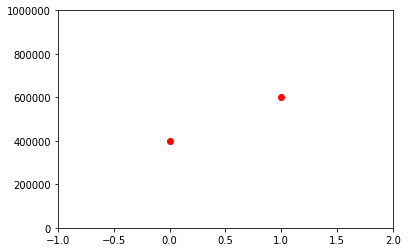

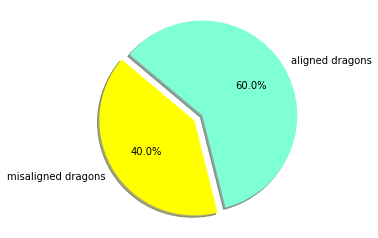

DONE


In [28]:
#GENERATE DATA SETS
import matplotlib.pyplot as plt

train_size=1000000
train_data=[]
train_correctness=[]

test_size=100
test_data=[]
test_correctness=[]



train_data,train_correctness = generateArrays(train_size)
test_data,test_correctness = generateArrays(test_size)

#for t in range(train_size):
    #print(train_data[t],train_correctness[t])
#print("DONE")

for t in range(test_size):
    print(test_data[t],test_correctness[t])

print(train_correctness.count(0),train_correctness.count(1))
plt.plot([train_correctness.count(0),train_correctness.count(1)],'ro')
plt.axis([-1,2,0,train_size])
plt.show()


labels = "misaligned dragons","aligned dragons"
sizes = train_correctness.count(0),train_correctness.count(1)
colors = 'yellow','aquamarine'
explode=(0.1,0)
plt.pie(sizes,explode=explode, labels=labels,colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()


print("DONE")

    

In [29]:
#IMPORTING STUFF
import tensorflow as ts
import keras as ks
import numpy as np


from keras.layers.core import Dense, Activation
from keras.optimizers import SGD,RMSprop,Adam 
from keras.models import Sequential
from keras.utils import np_utils
print("DONE")

DONE


In [30]:
#MAGIC NUMBERS
nr_neurons_in_first_layer=1000
nr_neurons_in_second_layer=100
nr_neurons_in_third_layer=10

nr_classes=2
optimizer=Adam()
my_batch_size=1000
my_epochs=100
print("done")

done


In [31]:
#FITTIN DATA
#tokenizing strings
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tk = Tokenizer()
tk.fit_on_texts(train_data)
index_list = tk.texts_to_sequences(train_data)
train_data = pad_sequences(index_list)#x_train = pad_sequences(index_list, maxlen=maxlen)

tk.fit_on_texts(test_data)
index_list = tk.texts_to_sequences(test_data)
test_data = pad_sequences(index_list)#x_train = pad_sequences(index_list, maxlen=maxlen)


#one hot encoding
train_correctness=np_utils.to_categorical(train_correctness, nr_classes)

test_correctness=np_utils.to_categorical(test_correctness, nr_classes)



print(train_data)
print(test_correctness)
print("done")

[[ 2  5 10  1]
 [ 2  6 24  1]
 [ 6  3 13  1]
 ...
 [ 6  5 23  1]
 [ 2  6 15  1]
 [ 4  5 19  1]]
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]
don

In [32]:
#BULIDING A MODEL
model=Sequential()
model.add(Dense(nr_neurons_in_first_layer, input_shape=(4,), activation='relu' ))
model.add(Dense(nr_neurons_in_second_layer, activation='relu'))
model.add(Dense(nr_neurons_in_third_layer, activation='relu'))
model.add(Dense(nr_classes, activation='softmax' ))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1000)              5000      
_________________________________________________________________
dense_9 (Dense)              (None, 100)               100100    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1010      
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 22        
Total params: 106,132
Trainable params: 106,132
Non-trainable params: 0
_________________________________________________________________


In [33]:
#COMPILING MODEL
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print("done")

done


In [34]:
#history = model.fit(x_train, y_train_onehot, batch_size=b_size, epochs=epoch, verbose=1, validation_split=0.2)

history= model.fit(train_data,train_correctness, batch_size=my_batch_size, epochs=my_epochs, verbose=2, validation_split=0.2)
print("done")

Train on 800000 samples, validate on 200000 samples
Epoch 1/100
 - 16s - loss: 0.5528 - acc: 0.7007 - val_loss: 0.4553 - val_acc: 0.8033
Epoch 2/100
 - 16s - loss: 0.4066 - acc: 0.7947 - val_loss: 0.3601 - val_acc: 0.8204
Epoch 3/100
 - 16s - loss: 0.3465 - acc: 0.8143 - val_loss: 0.3301 - val_acc: 0.8522
Epoch 4/100
 - 16s - loss: 0.3040 - acc: 0.8362 - val_loss: 0.2897 - val_acc: 0.8445
Epoch 5/100
 - 16s - loss: 0.2776 - acc: 0.8577 - val_loss: 0.2524 - val_acc: 0.8605
Epoch 6/100
 - 16s - loss: 0.2451 - acc: 0.8757 - val_loss: 0.2252 - val_acc: 0.8962
Epoch 7/100
 - 16s - loss: 0.2245 - acc: 0.8897 - val_loss: 0.2042 - val_acc: 0.8964
Epoch 8/100
 - 16s - loss: 0.2012 - acc: 0.9040 - val_loss: 0.1787 - val_acc: 0.9187
Epoch 9/100
 - 16s - loss: 0.1956 - acc: 0.9182 - val_loss: 0.1723 - val_acc: 0.9514
Epoch 10/100
 - 16s - loss: 0.1539 - acc: 0.9435 - val_loss: 0.1412 - val_acc: 0.9595
Epoch 11/100
 - 16s - loss: 0.1289 - acc: 0.9574 - val_loss: 0.1063 - val_acc: 0.9676
Epoch 12/10

Epoch 96/100
 - 16s - loss: 0.6466 - acc: 0.8355 - val_loss: 0.6589 - val_acc: 0.8348
Epoch 97/100
 - 16s - loss: 0.6451 - acc: 0.8362 - val_loss: 0.6589 - val_acc: 0.8348
Epoch 98/100
 - 16s - loss: 0.6229 - acc: 0.8359 - val_loss: 0.5838 - val_acc: 0.8472
Epoch 99/100
 - 16s - loss: 0.5789 - acc: 0.8426 - val_loss: 0.5836 - val_acc: 0.8472
Epoch 100/100
 - 16s - loss: 0.5797 - acc: 0.8410 - val_loss: 0.5894 - val_acc: 0.8391
done


In [37]:
score = model.evaluate(test_data,test_correctness)
print("done")

100/100 [==============================] - 0s 100us/step
done


In [38]:
print("score: ",score[0])
print("accuracy: ",score[1])

score:  1.2790085965844629
accuracy:  0.79
